<a href="https://colab.research.google.com/github/bama730/CS_4410/blob/main/HW6/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


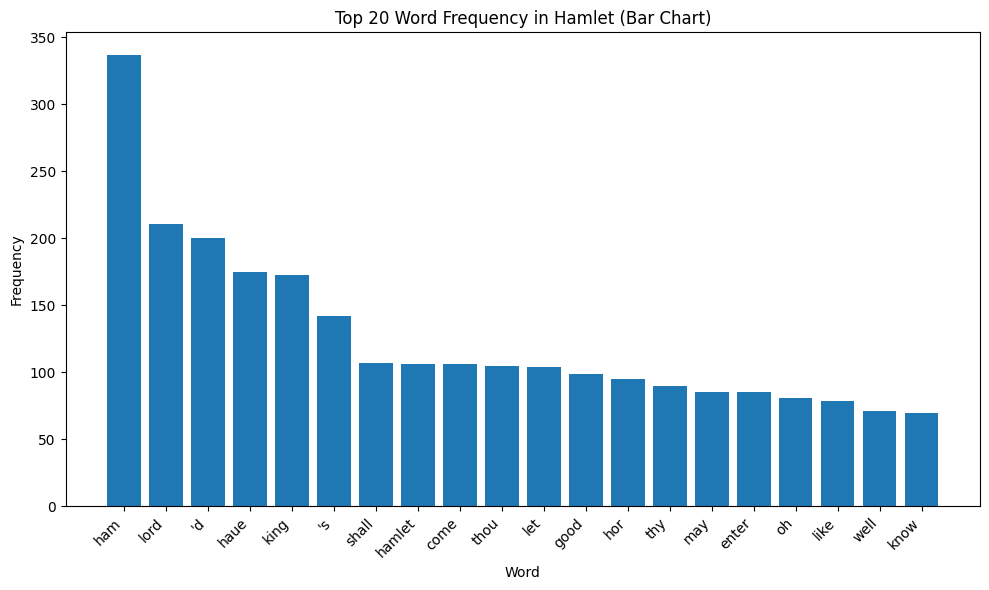

<ipython-input-27-2833c7c5f7ac>:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


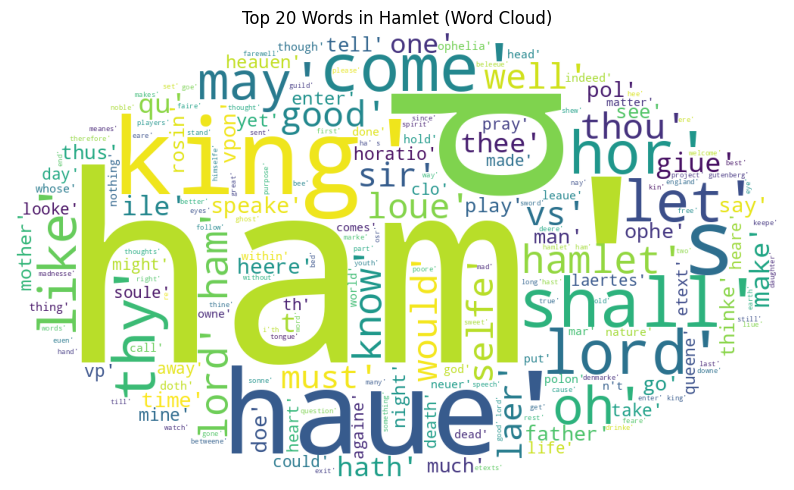

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Install TextBlob
!pip install textblob

# Import libraries
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import imageio
import numpy as np  # Import NumPy for potential data type conversion
import requests

# Download Hamlet text
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text  # Assuming the response is already text

# Preprocess text
blob = TextBlob(data.lower())  # Convert text to lowercase
text = blob.raw  # Extract text from TextBlob
words = blob.words  # Extract words (optional, for additional analysis)
stop_words = set(stopwords.words('english'))  # Get stopwords
filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords

# Count word frequency
word_counts = dict()
for word in filtered_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Ensure all values in word_counts are strings
word_counts = {str(k): v for k, v in word_counts.items()}  # Convert keys to strings if needed

# Get top 20 words
top_20_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20]
word_labels, word_counts = zip(*top_20_words)

# Convert word_counts tuple back to dictionary
#word_counts = zip(word_labels, word_counts)

# Create Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(word_labels, word_counts)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.title("Top 20 Word Frequency in Hamlet (Bar Chart)")
plt.tight_layout()
plt.show()

# Convert word_counts tuple back to dictionary
#word_counts = dict(zip(word_labels, word_counts))
cloud_words = str(filtered_words)

# **Generate Word Cloud:**
import imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)
wordcloud = WordCloud(background_color='white', mask=mask_image, stopwords=STOPWORDS).generate(cloud_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top 20 Words in Hamlet (Word Cloud)")
plt.show()

